In [1]:
import json 
import gzip
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer
from tqdm import tqdm

In [2]:
with open("/scratch/project_2005072/cassandra/ocr-postcorrection-lm/trashbin/huggingface_key.txt", "r") as f:
    access_token = f.readline()
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct", padding_side="left", token=access_token)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
file = "/scratch/project_2005072/cassandra/ocr-postcorrection-data/English/FULL_DOCUMENTS/en_dev_full.jsonl.gz"

In [4]:
lengths_character=[]
lengths_token=[]
with gzip.open(file, "r") as f:
    for line in f:
        book = json.loads(line)
        lengths_character.append(len(book["input"]))
        lengths_token.append(len(tokenizer.encode(book["input"])))

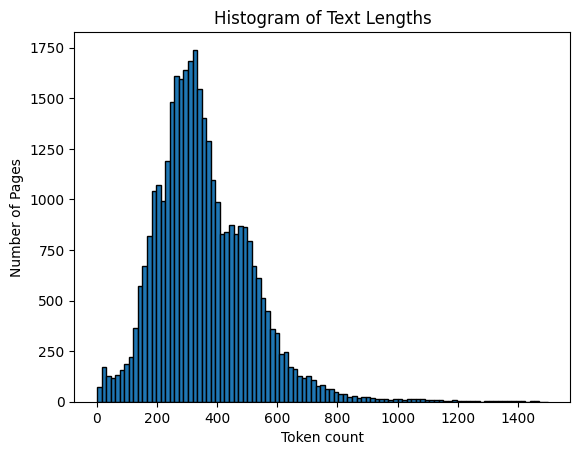

In [5]:
bins = np.linspace(0, 1500, 100)

hist, bin_edges = np.histogram(lengths_token, bins=bins)

plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", align="edge")

plt.xlabel('Token count')
plt.ylabel('Number of Pages')
plt.title('Histogram of Text Lengths')

plt.show()

In [9]:
print(lengths_token[int(len(lengths_token)/2)])

333


In [12]:
sum(lengths_token)/len(lengths_token)


367.47181051191427

In [13]:
len(lengths_token)

35084

In [7]:
print(lengths_token[-1])

3041
